## Packages

In [1]:
 import gdown
 import pandas as pd
 import IPython.display as display
 file_id = "1kgaIYgekgPAEYwCRxlKf6pzyPmu7amKx"
 download_url = f"https://drive.google.com/uc?id={file_id}"
 file_path = "/content/merged_climate_malaria_data.csv"
 gdown.download(download_url, file_path, quiet=False)
 data = pd.read_csv(file_path)
 display.display(data.head(10))

Downloading...
From: https://drive.google.com/uc?id=1kgaIYgekgPAEYwCRxlKf6pzyPmu7amKx
To: /content/merged_climate_malaria_data.csv
100%|██████████| 10.9k/10.9k [00:00<00:00, 20.2MB/s]


,period,PRECTOTCORR,PRECTOTCORR_SUM,PS,QV2M,RH2M,T2M,T2M_MAX,T2M_MIN,TS,confirmed,suspected,untested_treated
0,1/1/2013,0.00,0.00,96.88,12.51,62.94,24.90,34.15,13.84,24.49,4028,NaN,14108
1,2/1/2013,0.00,0.00,96.73,14.53,68.50,25.94,36.19,14.48,26.05,5554,NaN,13036
2,3/1/2013,5.27,84.38,96.76,17.58,79.31,26.53,34.65,21.34,26.87,6166,NaN,9040
3,4/1/2013,5.27,158.20,96.81,17.70,81.81,26.06,32.82,21.27,26.30,4821,NaN,12161
4,5/1/2013,5.27,131.84,96.92,17.64,83.81,25.58,31.61,21.11,25.83,5958,NaN,15281
5,6/1/2013,5.27,137.11,97.00,17.21,85.75,24.74,29.45,20.05,25.01,6986,NaN,16472
6,7/1/2013,5.27,142.38,97.07,16.48,85.69,24.09,28.93,19.87,24.45,9687,NaN,17236
7,8/1/2013,5.27,121.29,96.96,15.99,83.06,24.12,29.90,18.79,24.54,10269,NaN,20508
8,9/1/2013,5.27,179.30,96.98,16.85,84.94,24.55,30.51,20.26,24.74,7008,NaN,20658
9,10/1/2013,5.27,131.84,96.93,16.78,82.94,24.98,31.12,20.38,25.27,8344,NaN,21633


In [2]:
from google.colab import drive
import matplotlib.font_manager as fm
import matplotlib as mpl
import os

# ✅ Mounting Google Drive
drive.mount('/content/drive')

font_path = "/content/drive/MyDrive/times.ttf"

if os.path.isfile(font_path):
    times_new_roman = fm.FontProperties(fname=font_path)
    mpl.rcParams['font.family'] = times_new_roman.get_name()
    print("✅ Times New Roman loaded successfully!")
else:
    print("Font not found. Check the path.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Times New Roman loaded successfully!


In [3]:
df =data['confirmed']

In [4]:
import pandas as pd


df = pd.DataFrame(df)

df['period'] = pd.date_range(start='2013-01-01', periods=len(df), freq='MS')
df.set_index('period', inplace=True)

print(df.head())
print(df.index.freq)

            confirmed
period               
2013-01-01       4028
2013-02-01       5554
2013-03-01       6166
2013-04-01       4821
2013-05-01       5958
None


In [5]:

import pandas as pd

df = pd.DataFrame(data['confirmed'])

df['period'] = pd.date_range(start='2013-01-01', periods=len(df), freq='MS')
df.set_index('period', inplace=True)

print(df.head())
print(df.index.freq)

            confirmed
period               
2013-01-01       4028
2013-02-01       5554
2013-03-01       6166
2013-04-01       4821
2013-05-01       5958
None


In [6]:
confirmed_data = df
confirmed_data

,confirmed
period,
2013-01-01,4028
2013-02-01,5554
2013-03-01,6166
2013-04-01,4821
2013-05-01,5958
...,...
2023-08-01,19759
2023-09-01,18340
2023-10-01,19164


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Times New Roman loaded successfully.


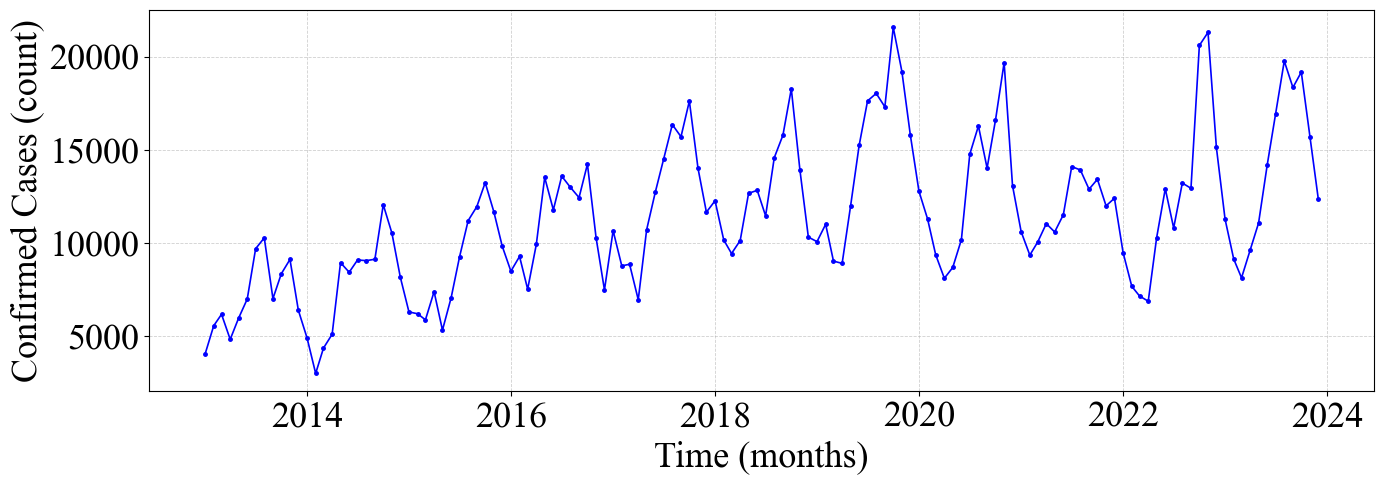

In [7]:
# ===============================================
# ✅ IMPORT LIBRARIES
# ===============================================
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os
from google.colab import drive

# ===============================================
# ✅ MOUNTING GOOGLE DRIVE
# ===============================================
drive.mount('/content/drive')

# ===============================================
# ✅ LOADING DATA
# ===============================================
df = pd.read_csv("merged_climate_malaria_data.csv")
df['period'] = pd.to_datetime(df['period'])
df.set_index('period', inplace=True)
df = df.asfreq('MS')
df['confirmed'] = df['confirmed'].astype(float)

# ===============================================
# ✅ LOADING TIMES NEW ROMAN FONT FROM DRIVE
# ===============================================
font_path = "/content/drive/MyDrive/times.ttf"
if os.path.isfile(font_path):
    times_new_roman = fm.FontProperties(fname=font_path)
    print("Times New Roman loaded successfully.")
else:
    print("Font not found. Falling back to serif.")
    times_new_roman = None

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26

# ===============================================
# ✅ PLOT FIGURES
# ===============================================
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(
    df.index,
    df['confirmed'],
    color='blue',
    linestyle='-',
    marker='o',
    markersize=2.5,
    linewidth=1.2
)

ax.set_xlabel("Time (months)", fontsize=26, fontproperties=times_new_roman)
ax.set_ylabel("Confirmed Cases (count)", fontsize=26, fontproperties=times_new_roman)
ax.tick_params(axis='both', labelsize=26)
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)
    label.set_fontsize(26)

plt.tight_layout()
plt.show()

# ===============================================
# ✅ SAVE HIGH-RESOLUTION OUTPUT
# ===============================================
fig.savefig("malaria_cases_over_time_1.pdf", bbox_inches='tight', dpi=600)


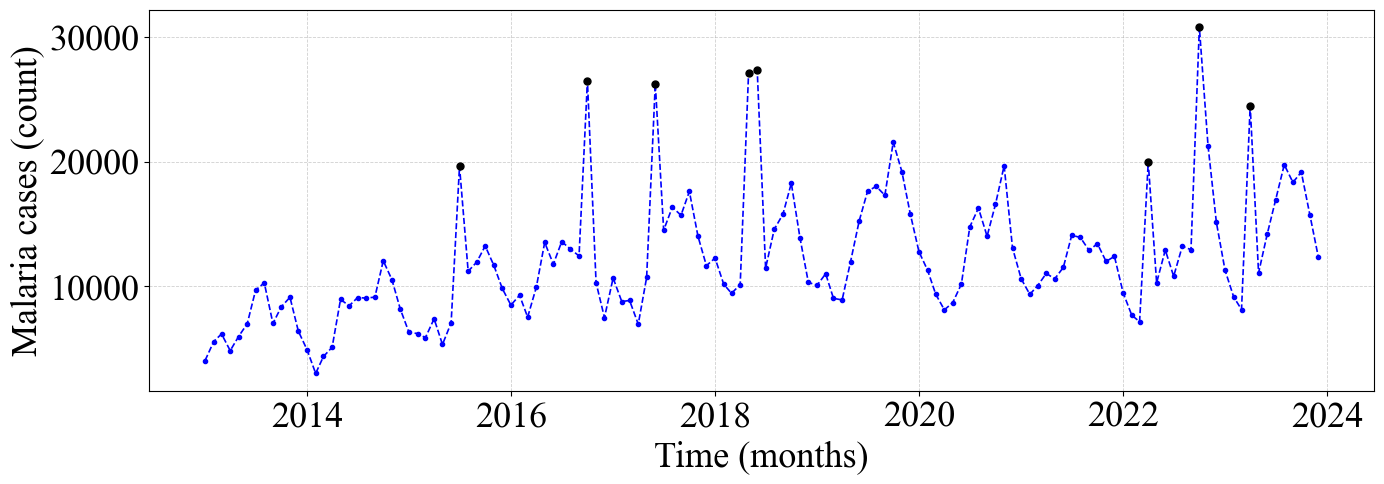

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
import os
from google.colab import drive

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26

# === OUTLIER INJECTION ===
if 'confirmed_outliers' not in df.columns:
    df['confirmed_outliers'] = df['confirmed'].copy()
    df['is_outlier'] = False
    df['stat_outlier'] = False

    train_size = int(len(df) * 0.8)
    train_indices = df.iloc[:train_size].index
    test_indices = df.iloc[train_size:].index

    np.random.seed(42)
    train_outliers = pd.Index(np.random.choice(train_indices, size=5, replace=False))
    step = len(test_indices) // 4
    test_outliers = pd.Index([test_indices[i] for i in [step, 2 * step, 3 * step]])
    all_outliers = train_outliers.append(test_outliers)

    df.loc[all_outliers, 'confirmed_outliers'] += np.random.randint(10000, 15000, size=8)

    Q1 = df['confirmed_outliers'].quantile(0.25)
    Q3 = df['confirmed_outliers'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    df['is_outlier'] = df.index.isin(all_outliers)
    df['stat_outlier'] = df['confirmed_outliers'] > upper_bound

# === DISPLAYING PLOT ===
fig_disp, ax_disp = plt.subplots(figsize=(14, 5))

ax_disp.plot(df.index, df['confirmed_outliers'], color='blue', linestyle='--', marker='o', markersize=3, linewidth=1.2)
ax_disp.scatter(df[df['is_outlier']].index, df[df['is_outlier']]['confirmed_outliers'], color='black', s=25, zorder=5)

ax_disp.set_xlabel("Time (months)", fontsize=26, fontproperties=times_new_roman)
ax_disp.set_ylabel("Malaria cases (count)", fontsize=26, fontproperties=times_new_roman)
ax_disp.tick_params(axis='both', labelsize=26)
ax_disp.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
for label in ax_disp.get_xticklabels() + ax_disp.get_yticklabels():
    label.set_fontproperties(times_new_roman)
    label.set_fontsize(26)

plt.tight_layout()
plt.show()

# === EXPORTING PLOT ===
fig_export, ax_export = plt.subplots(figsize=(14, 5))

ax_export.plot(df.index, df['confirmed_outliers'], color='blue', linestyle='--', marker='o', markersize=3, linewidth=1.2)
ax_export.scatter(df[df['is_outlier']].index, df[df['is_outlier']]['confirmed_outliers'], color='black', s=25, zorder=5)

ax_export.set_xlabel("Time (months)", fontsize=26, fontproperties=times_new_roman)
ax_export.set_ylabel("Malaria cases (count)", fontsize=26, fontproperties=times_new_roman)
ax_export.tick_params(axis='both', labelsize=26)
ax_export.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
for label in ax_export.get_xticklabels() + ax_export.get_yticklabels():
    label.set_fontproperties(times_new_roman)
    label.set_fontsize(26)


plt.tight_layout()
fig_export.savefig("fig_outliers_malaria_cases_FULL_2.pdf", bbox_inches='tight', dpi=600)
plt.close(fig_export)

In [9]:
df['confirmed_outliers']

,confirmed_outliers
period,
2013-01-01,4028.0
2013-02-01,5554.0
2013-03-01,6166.0
2013-04-01,4821.0
2013-05-01,5958.0
...,...
2023-08-01,19759.0
2023-09-01,18340.0
2023-10-01,19164.0


In [10]:
!pip install keras-tuner --quiet
!pip install scikeras
!pip install scikit-learn==1.4.2 --quiet
!pip install tensorflow-probability

### LSTM Grid Search with Standard and Minkowski Log-Cosh (MLC) Losses

This section performs a comprehensive grid search over multiple loss functions for an LSTM regression model trained on time series data with injected outliers.

---

#### Loss Functions Tested (MLC first)

**Minkowski Log-Cosh (MLC)** — parametric family with \(p \ge 1\):

$$
\mathcal{L}_{\mathrm{MLC}}^{(p)}=\frac{1}{n}\sum_{i=1}^{n}
\Big(\log\!\big(\cosh(y_i-\hat{y}_i)\big)\Big)^{p},
\qquad
p \in \{\,\mathbf{1.0},\,1.25,\,1.5,\,1.75,\,2.0,\,2.25,\,2.5,\,2.75,\,3.0\,\}.
$$

**Special case (Log-Cosh):** when \(p=1\),

$$
\mathcal{L}_{\mathrm{Log\text{-}Cosh}}=\frac{1}{n}\sum_{i=1}^{n}\log\!\big(\cosh(y_i-\hat{y}_i)\big).
$$

> **Don’t write MLC like this (incorrect):**
> \[
> \left(\frac{1}{n}\sum_{i=1}^{n}\log(\cosh(\cdot))\right)^{p}
> \]
> The exponent \(p\) applies **inside the sum** (per-sample) **before** averaging.  
> Also, \(\cosh(x)=\cosh(|x|)\), so the absolute value inside \(\cosh\) is redundant.

**Mean Squared Error (MSE):**

$$
\mathcal{L}_{\mathrm{MSE}}=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2
$$

**Mean Absolute Error (MAE):**

$$
\mathcal{L}_{\mathrm{MAE}}=\frac{1}{n}\sum_{i=1}^{n}\lvert y_i-\hat{y}_i\rvert
$$

---

#### Dataset Characteristics
- **Confirmed outliers:** Artificial outliers injected into the original confirmed cases series.  
- **Training approach:** Models are trained on outlier-contaminated data to test robustness.

---

#### Hyperparameter Grid
- **Units:** `[32, 64, 96, 100]`  
- **Dropout:** `[0.1, 0.2]`  
- **Learning rate:** `[0.001, 0.003, 0.005]`  
- **Batch size:** `[16, 32]`

---

#### 📊 Evaluation Methodology
- 3-fold cross-validation  
- Early stopping with patience of 30 epochs  
- Metrics reported: **MSE, RMSE, MAE, MAPE, MedAE, SMAPE**


In [11]:
# =============================================================================================
# LSTM Grid Search with MLC (Minkowski Log-Cosh) Loss Variants - OPTIMIZED VERSION
# =============================================================================================

import os
import random
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import time
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input, BatchNormalization
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import register_keras_serializable
from keras import backend as K
import gc
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# === REPRODUCIBILITY ===
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.config.experimental.enable_op_determinism()

# === MEMORY CLEANUP FUNCTION ===
def clear_memory():
    """More thorough memory cleanup"""
    K.clear_session()
    gc.collect()
    try:
        tf.compat.v1.reset_default_graph()
    except:
        pass

# === DATA PREPARATION ===
df_lstm = df[['confirmed_outliers']].copy()

# CRITICAL FIX: Avoid data leakage in scaling
train_size = int(len(df_lstm) * 0.8)
df_train = df_lstm.iloc[:train_size]
df_test = df_lstm.iloc[train_size:]

scaler = RobustScaler()
df_train_scaled = scaler.fit_transform(df_train[['confirmed_outliers']])
df_test_scaled = scaler.transform(df_test[['confirmed_outliers']])

look_back = 12
def create_lstm_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Train data
X_train, Y_train = create_lstm_dataset(df_train_scaled, look_back)
X_train = X_train.reshape((X_train.shape[0], look_back, 1))

# Add explicit validation split
X_train_final, X_val, Y_train_final, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=SEED, shuffle=False
)


combined_test_data = np.vstack([
    df_train_scaled[-look_back:],
    df_test_scaled
])
X_test, Y_test = create_lstm_dataset(combined_test_data, look_back)
X_test = X_test.reshape((X_test.shape[0], look_back, 1))
Y_actual = scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten()

print(f"Training samples: {len(df_train)}")
print(f"Test samples: {len(df_test)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# === CUSTOM LOSS FUNCTION ===
@register_keras_serializable()
def minkowski_log_cosh_loss(P):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        abs_error = tf.abs(y_true - y_pred)
        log_cosh = tf.math.log(tf.cosh(abs_error) + 1e-12)
        return tf.reduce_mean(tf.pow(log_cosh, P))
    return loss


# === LOSS FUNCTIONS ===
standard_losses = {
    "MSE": tf.keras.losses.MeanSquaredError(),
    "MAE": tf.keras.losses.MeanAbsoluteError()
}
mlc_P_values = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
mlc_losses = [(f"MLC_P={P}", minkowski_log_cosh_loss(P)) for P in mlc_P_values]
all_losses = list(standard_losses.items()) + mlc_losses

# === MODEL BUILDER ===
def build_model(units=64, dropout=0.1, lr=0.001, loss_fn=None):
    model = Sequential([
        Input(shape=(look_back, 1)),
        LSTM(units, return_sequences=True),
        BatchNormalization(), Dropout(dropout),
        LSTM(units, return_sequences=True),
        BatchNormalization(), Dropout(dropout),
        LSTM(units // 2),
        BatchNormalization(), Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss=loss_fn, metrics=['mae', 'mse'])
    return model

# === GRID SEARCH CONFIG ===
param_grid = {
    'model__units': [32, 64, 96, 100],
    'model__dropout': [0.1, 0.2],
    'model__lr': [0.001, 0.003, 0.005],
    'batch_size': [16, 32]
}

# Calculate total combinations for information
total_combinations = (len(param_grid['model__units']) *
                     len(param_grid['model__dropout']) *
                     len(param_grid['model__lr']) *
                     len(param_grid['batch_size']))
print(f"Total parameter combinations: {total_combinations}")
print(f"Total models to train (including CV and loss functions): {total_combinations * 3 * len(all_losses)}")

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=30,
    restore_best_weights=True,
    min_delta=0.001,
    mode='min',
    verbose=1
)

cv_splitter = KFold(n_splits=3, shuffle=True, random_state=SEED)

# === ADDITIONAL METRICS ===
def symmetric_mape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-7))

# === GRID SEARCH LOOP ===
results = []
all_predictions = {}
all_histories = {}
total_losses = len(all_losses)
current_loss = 0

for loss_name, loss_fn in all_losses:
    current_loss += 1
    print(f"\n=== [{current_loss}/{total_losses}] Grid Search for: {loss_name} ===")
    print("=" * 60)

    try:
        def create_model(units=64, dropout=0.1, lr=0.001):
            return build_model(units=units, dropout=dropout, lr=lr, loss_fn=loss_fn)

        regressor = KerasRegressor(
            model=create_model,
            epochs=100,
            verbose=0,
            callbacks=[early_stop]
        )

        gs = GridSearchCV(
            estimator=regressor,
            param_grid=param_grid,
            scoring='neg_mean_absolute_percentage_error',
            cv=cv_splitter,
            n_jobs=-1,
            error_score='raise',
            return_train_score=True
        )

        start_time = time.time()
        gs_result = gs.fit(X_train_final, Y_train_final, validation_data=(X_val, Y_val))
        training_time = time.time() - start_time

        clear_memory()

        best_model = gs_result.best_estimator_.model_

        preds = scaler.inverse_transform(best_model.predict(X_test, batch_size=32))
        all_predictions[loss_name] = preds.flatten()

        try:
            if hasattr(gs_result.best_estimator_, 'history_') and gs_result.best_estimator_.history_ is not None:
                all_histories[loss_name] = {
                    'loss': gs_result.best_estimator_.history_['loss'],
                    'val_loss': gs_result.best_estimator_.history_['val_loss']
                }
            else:
                all_histories[loss_name] = {
                    'loss': [float('nan')],
                    'val_loss': [float('nan')]
                }
                print(f"Warning: Could not retrieve training history for {loss_name}")
        except Exception as history_error:
            print(f"History retrieval failed for {loss_name}: {str(history_error)}")
            all_histories[loss_name] = {
                'loss': [float('nan')],
                'val_loss': [float('nan')]
            }

        mse = mean_squared_error(Y_actual, preds[:, 0])
        rmse = math.sqrt(mse)
        mae = np.mean(np.abs(Y_actual - preds[:, 0]))
        mape = np.mean(np.abs((Y_actual - preds[:, 0]) / (Y_actual + 1e-7))) * 100
        medae = median_absolute_error(Y_actual, preds[:, 0])
        smape = symmetric_mape(Y_actual, preds[:, 0])

        best_params = gs_result.best_params_

        results.append([
            loss_name,
            best_params['model__units'],
            best_params['model__dropout'],
            best_params['model__lr'],
            best_params['batch_size'],
            mse, rmse, mae, mape, medae, smape, training_time
        ])

        print(f"✅ {loss_name} | MAPE: {mape:.2f}% | Time: {training_time:.2f}s")
        print(f"Best Parameters: {best_params}")
        print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | SMAPE: {smape:.2f}%")

    except Exception as e:
        print(f"{loss_name} | Error: {str(e)}")
        results.append([loss_name, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        all_histories[loss_name] = {'loss': [float('nan')], 'val_loss': [float('nan')]}
        clear_memory()

# === RESULTS SUMMARY ===
results_df = pd.DataFrame(results, columns=[
    "Loss Function", "Units", "Dropout", "Learning Rate", "Batch Size",
    "MSE", "RMSE", "MAE", "MAPE (%)", "MedAE", "SMAPE (%)", "Training Time (s)"
])

results_df = results_df.sort_values(by="MAPE (%)", ascending=True).reset_index(drop=True)
results_df.to_csv("lstm_gridsearchcv_results.csv", index=False)

predictions_df = pd.DataFrame(all_predictions)
predictions_df['Actual'] = Y_actual
predictions_df.to_csv("lstm_predictions_gridsearchcv.csv", index=False)

history_data = []
for loss_name, history in all_histories.items():
    history_data.append({
        'Loss_Function': loss_name,
        'Train_Loss': history.get('loss', []),
        'Val_Loss': history.get('val_loss', []),
        'Epochs': len(history.get('loss', []))
    })

history_df = pd.DataFrame(history_data)
history_df.to_csv("gridsearchcv_history_data.csv", index=False)

print("\n" + "="*160)
print("FINAL GRIDSEARCHCV RESULTS")
print("="*160)
print(results_df.to_string(index=False))

print("\n" + "="*160)
print("HISTORY DATA AVAILABILITY")
print("="*160)
for loss_name, history in all_histories.items():
    print(f"{loss_name}: {len(history.get('loss', []))} training epochs, {len(history.get('val_loss', []))} validation epochs")

print("\nSaved to 'lstm_gridsearchcv_results.csv'")
print("Predictions saved to 'lstm_predictions_gridsearchcv.csv'")
print("History data saved to 'gridsearchcv_history_data.csv'")

clear_memory()

print("\n=== GridSearchCV Complete ===")
print(f"Total loss functions tested: {total_losses}")
print(f"Successful runs: {len(results_df.dropna())}")
print(f"Failed runs: {len(results_df) - len(results_df.dropna())}")

Training samples: 105
Test samples: 27
X_train shape: (93, 12, 1)
X_test shape: (27, 12, 1)
Total parameter combinations: 48
Total models to train (including CV and loss functions): 1584

=== [1/11] Grid Search for: MSE ===
Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 6.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
✅ MSE | MAPE: 26.27% | Time: 411.46s
Best Parameters: {'batch_size': 32, 'model__dropout': 0.1, 'model__lr': 0.003, 'model__units': 32}
RMSE: 5837.2235 | MAE: 4089.7821 | SMAPE: 27.88%

=== [2/11] Grid Search for: MAE ===
Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 10.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
✅ MAE | MAPE: 26.49% | Time: 426.27s
Best Parameters: {'batch_size': 16, 'model__dropout': 0.1, 'model__lr': 0.005, 'model__units': 64}
RMSE: 5354.0141 | MAE: 3830.8785 | SMAPE: 26.03%

=== [3/11] Grid Search for: MLC_P=1.0 ===
Restoring model weights from the end of the best epoch: 89.
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
✅ MLC_P=1.5 | MAPE: 22.73% | Time: 403.36s
Best Parameters: {'batch_size': 16, 'model__dropout': 0.2, 'model__lr': 0.005, 'model__units': 96}
RMSE: 5506.9012 | MAE: 3676.3623 | SMAPE: 24.63%

=== [6/11] Grid Search for: MLC_P=1.75 ===
Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 4.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
✅ MLC_P=1.75 | MAPE: 25.78% | Time: 405.75s
Best Parameters: {'batch_size': 32, 'model__dropout': 0.1, 'model__lr': 0.005, 'model__units': 32}
RMSE: 5760.2963 | MAE: 4016.2274 | SMAPE: 27.32%

=== [7/11] Grid Search for: MLC_P=2.0 ===
Epoch 53: early stopping
Restoring model weights from the end of the best epoch: 23.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
✅ MLC_P=2.0 | MAPE: 36.96% | Time: 399.18s
Best Parameters: {'batch_size': 16, 'model__dropout': 0.2, 'model__lr': 0.005, 'model__units': 100}
RMSE: 5786.2350 | MAE: 4847.1682 | SMAPE: 32.95%

=== [8/11] Grid Search for: MLC_P=2.25 ===
Epoch 41: early stopping
Restoring model weights from the end of the best epoch: 11.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
✅ MLC_P=2.25 | MAPE: 26.06% | Time: 388.98s
Best Parameters: {'batch_size': 32, 'model__dropout': 0.1, 'model__lr': 0.003, 'model__units': 32}
RMSE: 5750.7488 | MAE: 4026.8653 | SMAPE: 27.40%

=== [9/11] Grid Search for: MLC_P=2.5 ===
Epoch 3

#Plot of forcasts plot and training and validation loss plot

✅ Successfully loaded data from saved files


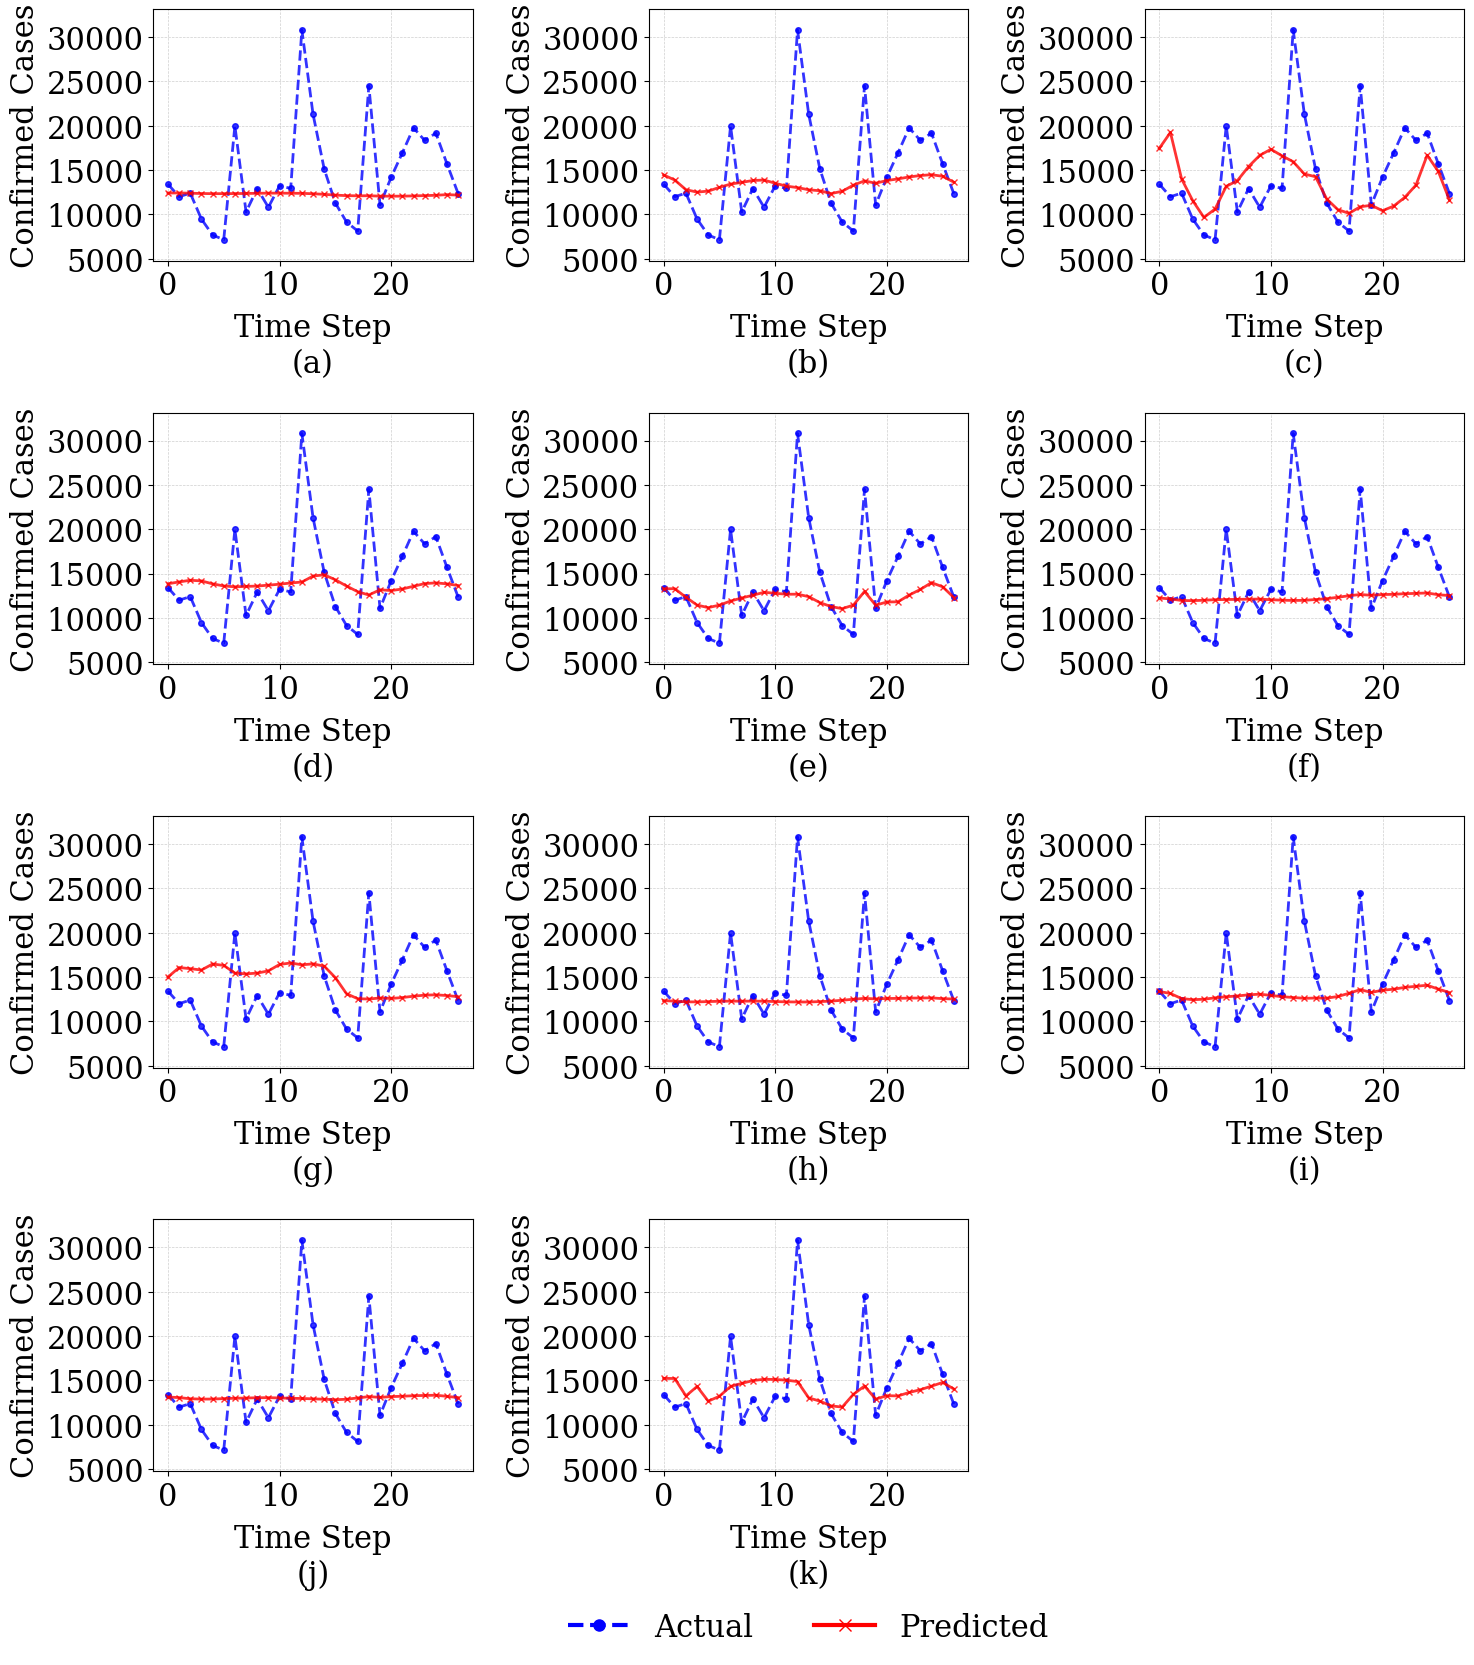

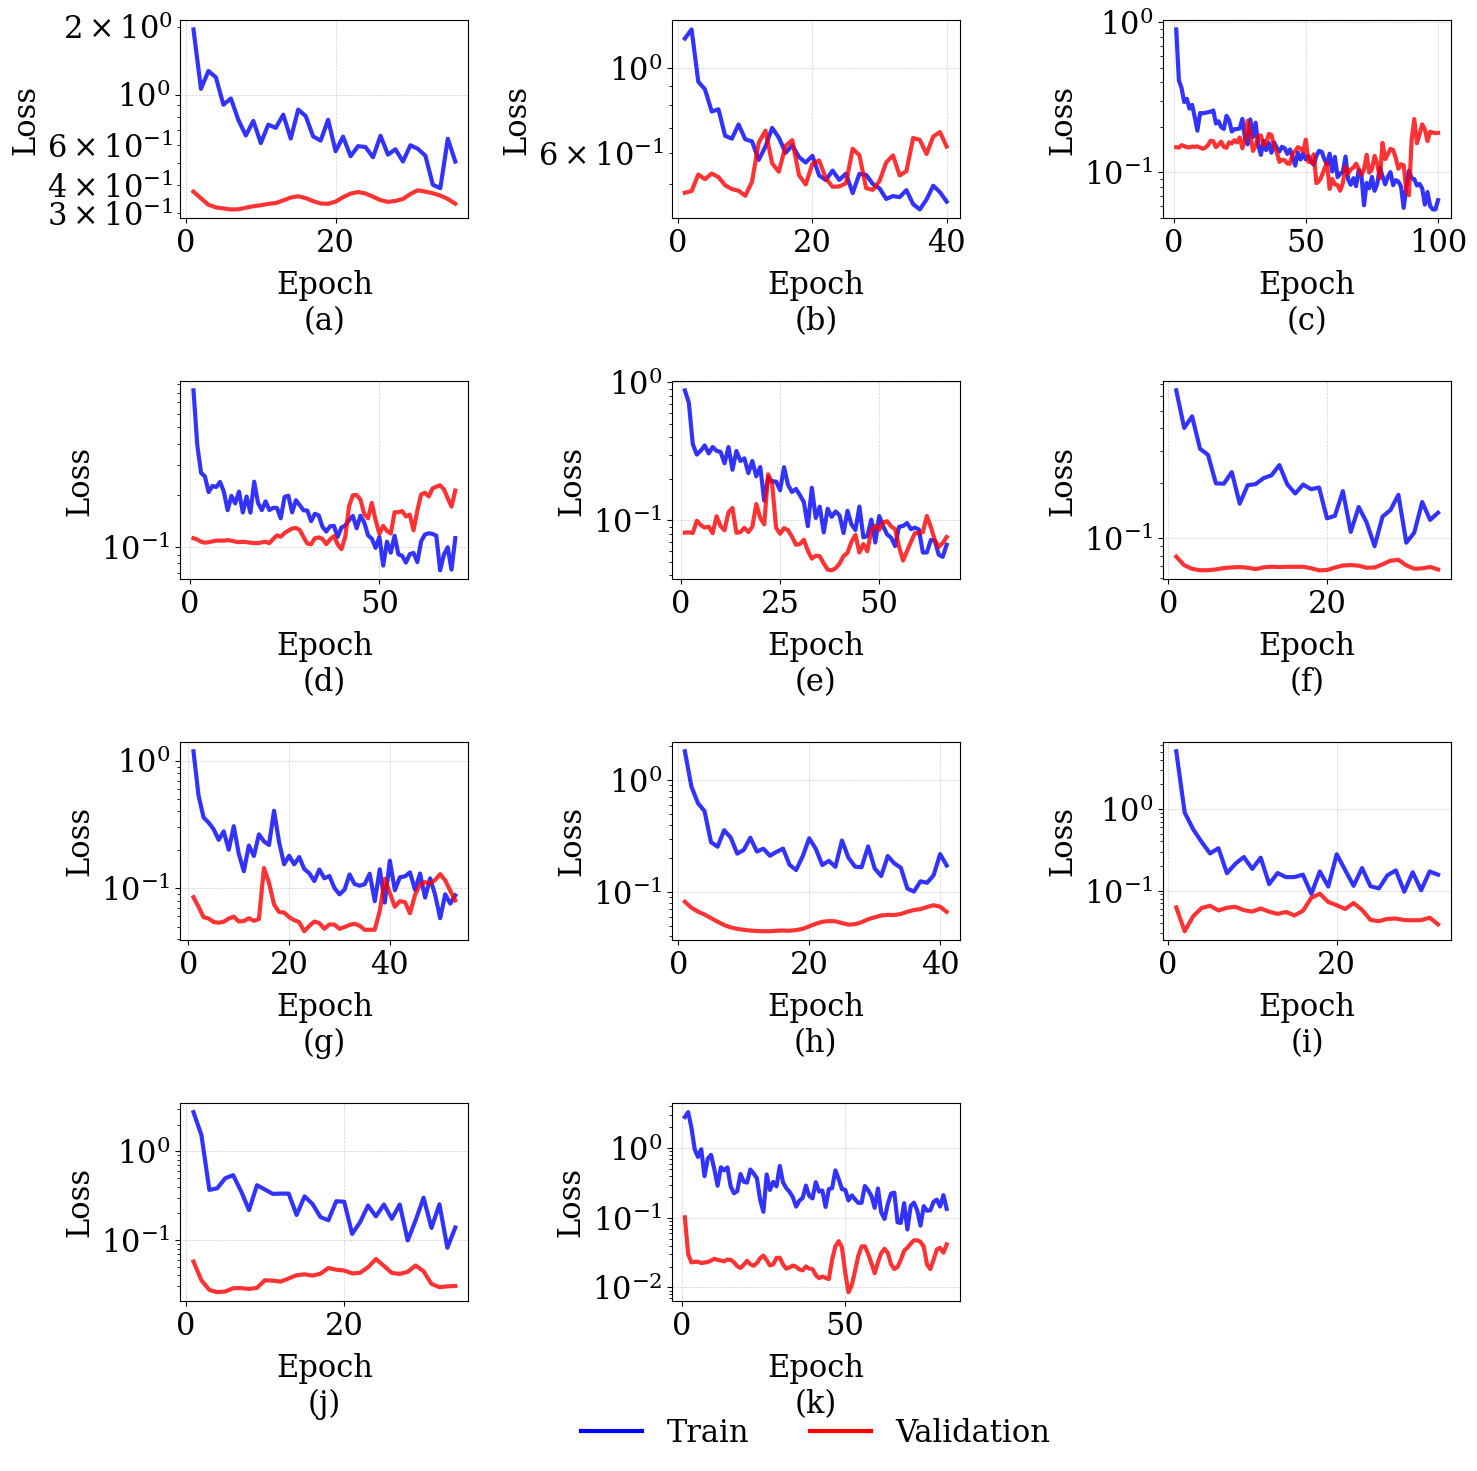

✅ Plotting completed: forecasts + loss curves saved.
📊 Files saved:
   - forecast_subplots_grid_search.pdf
   - forecast_subplots_grid_search.png
   - loss_curves_grid_search.pdf
   - loss_curves_grid_search.png


In [22]:
# ================================================================
# PLOTTING FORECASTS AND LOSS CURVES FOR GRID SEARCH RESULTS
# ================================================================

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import matplotlib as mpl
import warnings
import os

# === Style Configuration
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['grid.linestyle'] = '--'

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

# === LOAD DATA FROM SAVED FILES ===
try:
    predictions_df = pd.read_csv("lstm_predictions_gridsearchcv.csv")
    Y_true = predictions_df['Actual'].values

    plot_labels = ["MSE", "MAE"] + [f"MLC_P={p}" for p in [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]]
    preds_by_key = {label: predictions_df[label].values for label in plot_labels if label in predictions_df.columns}

    history_df = pd.read_csv("gridsearchcv_history_data.csv")
    history_by_key = {
        row['Loss_Function']: {
            'loss': eval(row['Train_Loss']) if isinstance(row['Train_Loss'], str) else row['Train_Loss'],
            'val_loss': eval(row['Val_Loss']) if isinstance(row['Val_Loss'], str) else row['Val_Loss']
        }
        for _, row in history_df.iterrows()
    }

    print("✅ Successfully loaded data from saved files")

except FileNotFoundError:
    print("Saved files not found. Using dummy data for demonstration...")
    Y_true = np.random.randn(50) + 10
    plot_labels = ["MSE", "MAE"] + [f"MLC_P={p}" for p in [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]]
    preds_by_key = {
        label: Y_true + np.random.normal(0, 2, len(Y_true)) for label in plot_labels
    }
    history_by_key = {
        label: {
            'loss': np.random.exponential(0.1, 50) * np.exp(-np.arange(50)/20),
            'val_loss': np.random.exponential(0.1, 50) * np.exp(-np.arange(50)/20) * 1.1
        }
        for label in plot_labels
    }

# === Grid Config
num_plots = len(plot_labels)
rows_grid = 4
cols_grid = 3
fig_w = 16
fig_h = 18

# -----------------------
# 1. Forecast Subplots
# -----------------------
fig_forecast, axes_forecast = plt.subplots(rows_grid, cols_grid, figsize=(fig_w, fig_h))
axes_forecast = axes_forecast.flatten()

for i, label in enumerate(plot_labels):
    ax = axes_forecast[i]
    time_steps = np.arange(len(Y_true))

    ax.plot(time_steps, Y_true, color='blue', linestyle='--', marker='o', markersize=4, linewidth=2, label='Actual', alpha=0.8)
    if label in preds_by_key and len(preds_by_key[label]) == len(Y_true):
        ax.plot(time_steps, preds_by_key[label], color='red', linestyle='-', marker='x', markersize=4, linewidth=2, label='Predicted', alpha=0.8)

    ax.set_xlabel(f"Time Step\n({chr(97+i)})", labelpad=8)
    ax.set_ylabel("Confirmed Cases")
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    if label in preds_by_key:
        all_data = np.concatenate([Y_true, preds_by_key[label]])
    else:
        all_data = Y_true
    y_min, y_max = np.min(all_data), np.max(all_data)
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Hide unused subplots
for ax in axes_forecast[num_plots:]:
    ax.set_visible(False)

# Forecast legend
legend_lines = [
    Line2D([0], [0], color='blue', linestyle='--', marker='o', markersize=8, linewidth=3),
    Line2D([0], [0], color='red', linestyle='-', marker='x', markersize=8, linewidth=3)
]
axes_forecast[num_plots - 1].legend(legend_lines, ["Actual", "Predicted"],
    loc="upper center", bbox_to_anchor=(0.5, -0.45), ncol=2, frameon=False, fontsize=22)

# Add vertical space at the top to show full Y-label
plt.subplots_adjust(left=0.05, hspace=0.14, wspace=0.4, top=1.11)
plt.tight_layout(rect=[0.05, 0.15, 1, 1.14])
fig_forecast.savefig("forecast_subplots_grid_search.pdf", bbox_inches='tight')
fig_forecast.savefig("forecast_subplots_grid_search.png", bbox_inches='tight', dpi=600)
plt.show()

# -----------------------
# 2. Loss Curves Subplots
# -----------------------
fig_loss, axes_loss = plt.subplots(rows_grid, cols_grid, figsize=(fig_w, fig_h))
axes_loss = axes_loss.flatten()

for i, label in enumerate(plot_labels):
    ax = axes_loss[i]
    if label in history_by_key:
        hist = history_by_key[label]
        if 'loss' in hist and len(hist['loss']) > 0:
            epochs = range(1, len(hist['loss']) + 1)
            ax.plot(epochs, hist['loss'], color='blue', linewidth=3, label='Train', alpha=0.8)
        if 'val_loss' in hist and len(hist['val_loss']) > 0:
            epochs = range(1, len(hist['val_loss']) + 1)
            ax.plot(epochs, hist['val_loss'], color='red', linewidth=3, label='Validation', alpha=0.8)

    ax.set_xlabel(f"Epoch\n({chr(97+i)})", labelpad=8)
    ax.set_ylabel("Loss")
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    ax.set_yscale('log')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)

# Hide unused subplots
for ax in axes_loss[num_plots:]:
    ax.set_visible(False)

# Loss legend
loss_legend_lines = [
    Line2D([0], [0], color='blue', linewidth=3),
    Line2D([0], [0], color='red', linewidth=3)
]
axes_loss[num_plots - 1].legend(loss_legend_lines, ["Train", "Validation"],
    loc="upper center", bbox_to_anchor=(0.5, -0.45), ncol=2, frameon=False, fontsize=22)

# Layout for loss
plt.subplots_adjust(left=0.05, hspace=0.7, wspace=0.4)
plt.tight_layout(rect=[0.05, 0.15, 1, 1])
fig_loss.savefig("loss_curves_grid_search.pdf", bbox_inches='tight')
fig_loss.savefig("loss_curves_grid_search.png", bbox_inches='tight', dpi=600)
plt.show()

print("✅ Plotting completed: forecasts + loss curves saved.")
print("📊 Files saved:")
print("   - forecast_subplots_grid_search.pdf")
print("   - forecast_subplots_grid_search.png")
print("   - loss_curves_grid_search.pdf")
print("   - loss_curves_grid_search.png")
